**THE SPARKS FOUNDATION**

**AUTHOR : Tarushikha Sharma**

**Task 1 : Prediction Using Supervised ML**

**Objective : What will be predicted score if a student studies for 9.25 hrs/day?** 

The task is build on Supervised Learning. 

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
 # Reading data
 path = "http://bit.ly/w-data"
 data = pd.read_csv(path)
 print("Data Imported Successfully")
 data.head()

Data Imported Successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
# Check if there are null values in the dataset or not
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
# use describe() method to see mean, pecrntiles, max, min, std deviation, count of the given dataset
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
# to print full information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Visualizing the Dataset**

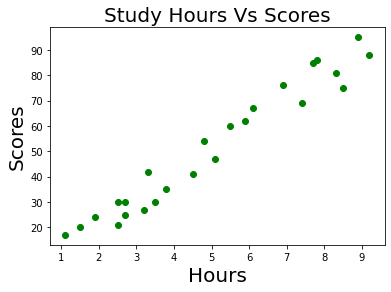

In [ ]:
# plotting Scatter Plot
plt.xlabel('Hours', fontsize=20)
plt.ylabel('Scores', fontsize=20)
plt.title('Study Hours Vs Scores', fontsize=20)
plt.scatter(data.Hours,data.Scores, color='green', marker='o')
plt.show()


**The Scatter plot shows the positive linear relation between the number of hours studied and percentage of scores.**

**Preparing The Data**

In [ ]:
# divide data into labels(output) and attributes(input)
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [ ]:
# now we need to split the data into training and test sets which can be done by
# Scikit-Learn's built-in train_test_split() method:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


**Training the Algorithm**

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
print("Training Complete")

Training Complete


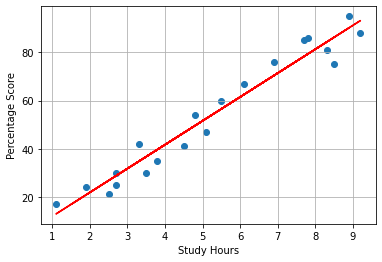

In [ ]:
# Plotting the Regression Line
line = reg.coef_*X + reg.intercept_
plt.scatter(X_train, y_train)
plt.plot(X, line, color = 'red')
plt.xlabel('Study Hours')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

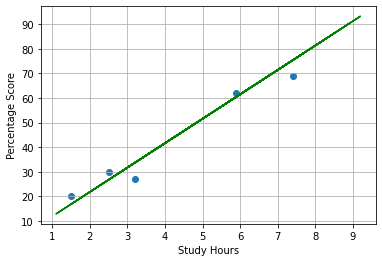

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X, line, color = 'green')
plt.xlabel('Study Hours')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()


**Making Predictions**

In [ ]:
# Tseting data - In hours
print(X_test)
# Predicting Scores
y_pred = reg.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
# Comparing Actual Vs Predicted
compare_scores = pd.DataFrame({'Actaul': y_test, 'Predicted':y_pred})
compare_scores

,Actaul,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [ ]:
# fit test
from sklearn import metrics
print('Accuracy of Actual and Predicted r-squared:-', metrics.r2_score(y_test, y_pred))

Accuracy of Actual and Predicted r-squared:- 0.9454906892105354


**Above 93% Score is a good model!!**

**Evaluating the Model**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
MAb_E = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("Mean Squared error : ", MSE)
print("Root Mean Squared error : ", RMSE)
print("Mean Absolute error : ", MAb_E)

Mean Squared error :  21.598769307217456
Root Mean Squared error :  4.647447612100373
Mean Absolute error :  4.647447612100373


**Small Value of Mean Absolute Error shows that chances of error or wrong forecasting through the model are very less.**

**What will be predicted score of a student studies for 9.25 hrs/ day?**

In [ ]:
hours = [9.25]
result = reg.predict([hours])
print("Predicted Score for 9.25 hours/day = {}".format(round(result[0],2)))

Predicted Score for 9.25 hours/day = 93.69


**Through Regression Model, we can conclude that if a student studies for 9.25 hours a day, then he/she is likely to score 93.69 marks.**